## ML with Pyspark 
### Data Source
+ https://www.kaggle.com/hikne707/big-five-european-soccer-leagues 

In [2]:
# Load our Packages
from pyspark import SparkContext
import pandas as pd

In [1]:
#do not want it to use all the cores on my machine so only specified 2
sc = SparkContext(master='local[2]')

In [3]:
sc

<SparkContext master=local[*] appName=PySparkShell>

In [4]:
from pyspark.sql import SparkSession

In [5]:
spark = SparkSession.builder.appName("Spark_England").getOrCreate()

### workflow
* Data Prep
+ Feature Engineering
+ Build Model 
+ Evaluate 

# Task 
+ predict what team will win in the spain league/country based on parameters
+ multi-classification problem win, lose, or tie

In [6]:
# load our dataset other data set that can be used ...
#Partitioned by country for testing 
# France_league_V1.csv
# Spain_league_V1.csv
# Germany_league_V1.csv
# Italy_league_V1.csv
# Leagues_V1.csv (entire dataset)
df = spark.read.csv("D:/Senior/Capstone/data-science-enviroment/data/Leagues/Leagues_V1.csv", header=True, inferSchema=True)

In [7]:
# data prieview
df.toPandas().transpose()

,0,1,2,3,4,5,6,7,8,9,...,44259,44260,44261,44262,44263,44264,44265,44266,44267,44268
Round,1,1,1,1,1,1,1,1,1,1,...,25,25,25,25,26,26,26,26,26,26
Date,(Sat) 19 Aug 1995 (W33),(Sat) 19 Aug 1995 (W33),(Sat) 19 Aug 1995 (W33),(Sat) 19 Aug 1995 (W33),(Sat) 19 Aug 1995 (W33),(Sat) 19 Aug 1995 (W33),(Sat) 19 Aug 1995 (W33),(Sat) 19 Aug 1995 (W33),(Sat) 19 Aug 1995 (W33),(Sun) 20 Aug 1995 (W33),...,(Sat) 29 Feb 2020 (W9),(Sat) 29 Feb 2020 (W9),(Sun) 1 Mar 2020 (W9),(Sun) 1 Mar 2020 (W9),(Sun) 8 Mar 2020 (W10),(Sun) 8 Mar 2020 (W10),(Sun) 8 Mar 2020 (W10),(Sun) 8 Mar 2020 (W10),(Sun) 8 Mar 2020 (W10),(Mon) 9 Mar 2020 (W11)
Team_1,28,38,63,127,129,135,185,220,222,26,...,176,178,206,56,145,8,200,208,116,207
Team_2,130,150,80,184,198,65,137,123,41,131,...,40,197,29,19,175,99,110,11,86,45
Year,1995,1995,1995,1995,1995,1995,1995,1995,1995,1995,...,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019
Country,0,0,0,0,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4
FT_Team_1,3,1,0,1,1,3,3,1,3,1,...,2,2,2,3,0,1,2,0,2,3
FT_Team_2,1,0,0,0,1,0,4,2,2,1,...,0,1,7,4,1,2,1,0,0,0
HT_Team_1,3,1,0,0,0,1,1,1,2,1,...,2,1,2,1,0,0,0,0,0,1
HT_Team_2,0,0,0,0,1,0,3,0,2,1,...,0,0,2,2,0,2,1,0,0,0


In [8]:
print(df.columns)

['Round', 'Date', 'Team_1', 'Team_2', 'Year', 'Country', 'FT_Team_1', 'FT_Team_2', 'HT_Team_1', 'HT_Team_2', 'GGD', 'Team_1_(pts)', 'Team_2_(pts)', 'Outcome']


In [9]:
# check datatypes
# inferschema changes type string to int, creates less work
df.dtypes

[('Round', 'int'),
 ('Date', 'string'),
 ('Team_1', 'int'),
 ('Team_2', 'int'),
 ('Year', 'int'),
 ('Country', 'int'),
 ('FT_Team_1', 'int'),
 ('FT_Team_2', 'int'),
 ('HT_Team_1', 'int'),
 ('HT_Team_2', 'int'),
 ('GGD', 'int'),
 ('Team_1_(pts)', 'int'),
 ('Team_2_(pts)', 'int'),
 ('Outcome', 'int')]

In [10]:
numeric_features = [t[0] for t in df.dtypes if t[1] == 'int']
df.select(numeric_features).describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
Round,44269,18.85215387743116,10.69436167875799,1,42
Team_1,44269,116.13731956899862,65.86836087913031,0,225
Team_2,44269,116.14540649212768,65.86693260333435,0,225
Year,44269,2007.006641216201,7.130475473617486,1995,2019
Country,44269,1.923603424518286,1.4205855531945584,0,4
FT_Team_1,44269,1.5392712733515552,1.282206642446248,0,10
FT_Team_2,44269,1.1120648760983984,1.1096381331815164,0,9
HT_Team_1,44269,0.6801373421581693,0.82479238518056,0,7
HT_Team_2,44269,0.4779868531026226,0.695605066744848,0,6


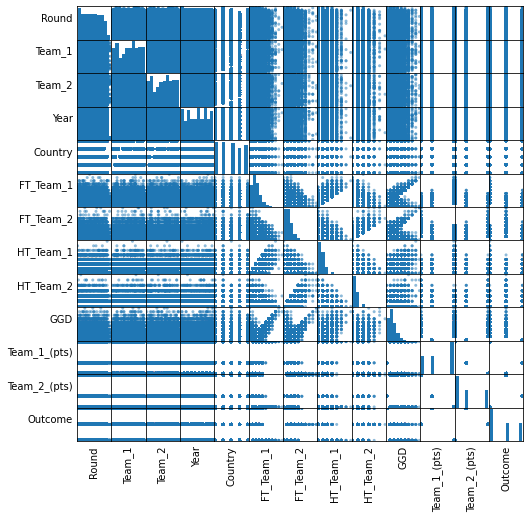

In [11]:
numeric_data = df.select(numeric_features).toPandas()
axs = pd.plotting.scatter_matrix(numeric_data, figsize=(8, 8));
n = len(numeric_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

In [12]:
# Value Count (check if dataSet is balance)
#take into acount the data is very skwewed
df.groupBy('Outcome').count().toPandas().transpose()

,0,1,2
Outcome,1,3,2
count,20732,11711,11826


### Feature Engineering
* Numericcal values
* Vectorization (the process of converting an algorithm from operating on a single value at a time to operating on a set of values (vector) at one time.)
* Scaling

In [13]:
import pyspark.ml
# load Ml packages
from pyspark.ml.feature import VectorAssembler, StringIndexer


In [14]:
# 2nd half goals full time - half time
df= df.withColumn("H2_Team_1", df['FT_Team_1']-df['HT_Team_1'])
df= df.withColumn("H2_Team_2", df['FT_Team_2']-df['HT_Team_2'])

In [15]:
#Rename HT to represent 1/2 halves, sorry for the redundency spark beginner
df= df.withColumnRenamed('HT_Team_1','H1_Team_1')
df= df.withColumnRenamed('HT_Team_2','H1_Team_2')

In [16]:
#Goal difference given, creating + for home win and - for away win
df= df.withColumn('FT_GD', df['FT_Team_1']-df['FT_Team_2'])
df= df.withColumn('H1_GD', df['H1_Team_1']-df['H1_Team_2'])
df= df.withColumn('H2_GD', df['FT_GD']-df['H1_GD'])



In [17]:
# addded colums include: 
#second half goal difference for home and away
#Full time goal differnce (displays negative if away team scores more)
# goals sccored second half 
# I thought about stripping the date in this case but i dont find it nesscary since we already have the year to work with, date will get dropped later on.
print(df.columns)

['Round', 'Date', 'Team_1', 'Team_2', 'Year', 'Country', 'FT_Team_1', 'FT_Team_2', 'H1_Team_1', 'H1_Team_2', 'GGD', 'Team_1_(pts)', 'Team_2_(pts)', 'Outcome', 'H2_Team_1', 'H2_Team_2', 'FT_GD', 'H1_GD', 'H2_GD']


In [18]:
#rearranging column so the output = outcome is at the end
df = df.select('Round', 'Date', 'Team_1', 'Team_2', 'Year', 'Country', 'FT_Team_1', 'FT_Team_2', 'H1_Team_1', 'H1_Team_2', 'GGD', 'Team_1_(pts)', 'Team_2_(pts)', 'H2_Team_1', 'H2_Team_2', 'FT_GD', 'H1_GD', 'H2_GD', 'Outcome')

In [19]:
df.toPandas().transpose()

,0,1,2,3,4,5,6,7,8,9,...,44259,44260,44261,44262,44263,44264,44265,44266,44267,44268
Round,1,1,1,1,1,1,1,1,1,1,...,25,25,25,25,26,26,26,26,26,26
Date,(Sat) 19 Aug 1995 (W33),(Sat) 19 Aug 1995 (W33),(Sat) 19 Aug 1995 (W33),(Sat) 19 Aug 1995 (W33),(Sat) 19 Aug 1995 (W33),(Sat) 19 Aug 1995 (W33),(Sat) 19 Aug 1995 (W33),(Sat) 19 Aug 1995 (W33),(Sat) 19 Aug 1995 (W33),(Sun) 20 Aug 1995 (W33),...,(Sat) 29 Feb 2020 (W9),(Sat) 29 Feb 2020 (W9),(Sun) 1 Mar 2020 (W9),(Sun) 1 Mar 2020 (W9),(Sun) 8 Mar 2020 (W10),(Sun) 8 Mar 2020 (W10),(Sun) 8 Mar 2020 (W10),(Sun) 8 Mar 2020 (W10),(Sun) 8 Mar 2020 (W10),(Mon) 9 Mar 2020 (W11)
Team_1,28,38,63,127,129,135,185,220,222,26,...,176,178,206,56,145,8,200,208,116,207
Team_2,130,150,80,184,198,65,137,123,41,131,...,40,197,29,19,175,99,110,11,86,45
Year,1995,1995,1995,1995,1995,1995,1995,1995,1995,1995,...,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019
Country,0,0,0,0,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4
FT_Team_1,3,1,0,1,1,3,3,1,3,1,...,2,2,2,3,0,1,2,0,2,3
FT_Team_2,1,0,0,0,1,0,4,2,2,1,...,0,1,7,4,1,2,1,0,0,0
H1_Team_1,3,1,0,0,0,1,1,1,2,1,...,2,1,2,1,0,0,0,0,0,1
H1_Team_2,0,0,0,0,1,0,3,0,2,1,...,0,0,2,2,0,2,1,0,0,0


As you can see home and away team have been label enconded already and converted into numbers(this data was worked on before bringinto jupyter notebook, it is not the raw file, all that is left to do is the date column and as I mention above the initial plan was to drop it but month and year(which we already) can be useful.

In [20]:
# Split the date column to get month, then label encode month
from pyspark.sql.functions import split
df = df.withColumn('Month', split(df['Date'],' ').getItem(2))

In [21]:
# convert the string Month into numbers
# label encoding
monthEncoder = StringIndexer(inputCol='Month',outputCol='Game_Month').fit(df)

In [22]:
df = monthEncoder.transform(df)

In [23]:
df.toPandas().transpose()

,0,1,2,3,4,5,6,7,8,9,...,44259,44260,44261,44262,44263,44264,44265,44266,44267,44268
Round,1,1,1,1,1,1,1,1,1,1,...,25,25,25,25,26,26,26,26,26,26
Date,(Sat) 19 Aug 1995 (W33),(Sat) 19 Aug 1995 (W33),(Sat) 19 Aug 1995 (W33),(Sat) 19 Aug 1995 (W33),(Sat) 19 Aug 1995 (W33),(Sat) 19 Aug 1995 (W33),(Sat) 19 Aug 1995 (W33),(Sat) 19 Aug 1995 (W33),(Sat) 19 Aug 1995 (W33),(Sun) 20 Aug 1995 (W33),...,(Sat) 29 Feb 2020 (W9),(Sat) 29 Feb 2020 (W9),(Sun) 1 Mar 2020 (W9),(Sun) 1 Mar 2020 (W9),(Sun) 8 Mar 2020 (W10),(Sun) 8 Mar 2020 (W10),(Sun) 8 Mar 2020 (W10),(Sun) 8 Mar 2020 (W10),(Sun) 8 Mar 2020 (W10),(Mon) 9 Mar 2020 (W11)
Team_1,28,38,63,127,129,135,185,220,222,26,...,176,178,206,56,145,8,200,208,116,207
Team_2,130,150,80,184,198,65,137,123,41,131,...,40,197,29,19,175,99,110,11,86,45
Year,1995,1995,1995,1995,1995,1995,1995,1995,1995,1995,...,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019
Country,0,0,0,0,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4
FT_Team_1,3,1,0,1,1,3,3,1,3,1,...,2,2,2,3,0,1,2,0,2,3
FT_Team_2,1,0,0,0,1,0,4,2,2,1,...,0,1,7,4,1,2,1,0,0,0
H1_Team_1,3,1,0,0,0,1,1,1,2,1,...,2,1,2,1,0,0,0,0,0,1
H1_Team_2,0,0,0,0,1,0,3,0,2,1,...,0,0,2,2,0,2,1,0,0,0


In [24]:
#get encoded labels, annoying since labels are not from 0-11 jan-dec
monthEncoder.labels

['Apr',
 'Dec',
 'Feb',
 'Nov',
 'Mar',
 'Sep',
 'Oct',
 'Jan',
 'May',
 'Aug',
 'Jun',
 'Jul']

In [25]:
print(df.columns)

['Round', 'Date', 'Team_1', 'Team_2', 'Year', 'Country', 'FT_Team_1', 'FT_Team_2', 'H1_Team_1', 'H1_Team_2', 'GGD', 'Team_1_(pts)', 'Team_2_(pts)', 'H2_Team_1', 'H2_Team_2', 'FT_GD', 'H1_GD', 'H2_GD', 'Outcome', 'Month', 'Game_Month']


In [26]:
#as you can see we dropped the column Date
required_features = ['Round', 'Team_1', 'Team_2', 'Year', 'Country', 'FT_Team_1', 'FT_Team_2', 'H1_Team_1', 'H1_Team_2', 'GGD', 'Team_1_(pts)', 'Team_2_(pts)', 'H2_Team_1', 'H2_Team_2', 'FT_GD', 'H1_GD', 'H2_GD', 'Game_Month', 'Outcome']

In [27]:
# VectorAssembly
vec_assembler = VectorAssembler(inputCols=required_features,outputCol='features')


In [28]:
#sticking entire feature required in a vector which I will be using to Model 
vec_df = vec_assembler.transform(df)
print(vec_df)

DataFrame[Round: int, Date: string, Team_1: int, Team_2: int, Year: int, Country: int, FT_Team_1: int, FT_Team_2: int, H1_Team_1: int, H1_Team_2: int, GGD: int, Team_1_(pts): int, Team_2_(pts): int, H2_Team_1: int, H2_Team_2: int, FT_GD: int, H1_GD: int, H2_GD: int, Outcome: int, Month: string, Game_Month: double, features: vector]


In [29]:
from pyspark.ml.feature import ChiSqSelector

selector = ChiSqSelector(numTopFeatures=4, featuresCol="features",
                         outputCol="selectedFeatures", labelCol="Outcome")

In [30]:
result = selector.fit(vec_df).transform(vec_df)
result.toPandas().transpose()

,0,1,2,3,4,5,6,7,8,9,...,44259,44260,44261,44262,44263,44264,44265,44266,44267,44268
Round,1,1,1,1,1,1,1,1,1,1,...,25,25,25,25,26,26,26,26,26,26
Date,(Sat) 19 Aug 1995 (W33),(Sat) 19 Aug 1995 (W33),(Sat) 19 Aug 1995 (W33),(Sat) 19 Aug 1995 (W33),(Sat) 19 Aug 1995 (W33),(Sat) 19 Aug 1995 (W33),(Sat) 19 Aug 1995 (W33),(Sat) 19 Aug 1995 (W33),(Sat) 19 Aug 1995 (W33),(Sun) 20 Aug 1995 (W33),...,(Sat) 29 Feb 2020 (W9),(Sat) 29 Feb 2020 (W9),(Sun) 1 Mar 2020 (W9),(Sun) 1 Mar 2020 (W9),(Sun) 8 Mar 2020 (W10),(Sun) 8 Mar 2020 (W10),(Sun) 8 Mar 2020 (W10),(Sun) 8 Mar 2020 (W10),(Sun) 8 Mar 2020 (W10),(Mon) 9 Mar 2020 (W11)
Team_1,28,38,63,127,129,135,185,220,222,26,...,176,178,206,56,145,8,200,208,116,207
Team_2,130,150,80,184,198,65,137,123,41,131,...,40,197,29,19,175,99,110,11,86,45
Year,1995,1995,1995,1995,1995,1995,1995,1995,1995,1995,...,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019
Country,0,0,0,0,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4
FT_Team_1,3,1,0,1,1,3,3,1,3,1,...,2,2,2,3,0,1,2,0,2,3
FT_Team_2,1,0,0,0,1,0,4,2,2,1,...,0,1,7,4,1,2,1,0,0,0
H1_Team_1,3,1,0,0,0,1,1,1,2,1,...,2,1,2,1,0,0,0,0,0,1
H1_Team_2,0,0,0,0,1,0,3,0,2,1,...,0,0,2,2,0,2,1,0,0,0


### Train, Test, Split

In [31]:
train_df,test_df = result.randomSplit([0.7,0.3])

In [32]:
train_df.count()

30773

### Model Building
+ random forest: builds multiple decision trees and merges them together to get a more accurate and stable prediction. You will see me use 10 as the number of trees created below, this can vary but a good rule is to use at least the number of feature to predict your model.



In [33]:
from pyspark.ml.classification import RandomForestClassifier

In [34]:
# Models will be tuned according to data
rfc = RandomForestClassifier(featuresCol='selectedFeatures',labelCol='Outcome', numTrees=10)


In [35]:
rfc_model = rfc.fit(train_df)


In [36]:

y_pred_rfc = rfc_model.transform(test_df)

In [39]:
y_pred_rfc.toPandas().transpose()

,0,1,2,3,4,5,6,7,8,9,...,13486,13487,13488,13489,13490,13491,13492,13493,13494,13495
Round,1,1,1,1,1,1,1,1,1,1,...,41,41,42,42,42,42,42,42,42,42
Date,(Fri) 1 Aug 1997 (W31),(Fri) 10 Aug 2018 (W32),(Fri) 11 Aug 1995 (W32),(Fri) 11 Aug 1995 (W32),(Fri) 11 Aug 2017 (W32),(Fri) 12 Aug 2016 (W32),(Fri) 13 Aug 1999 (W32),(Fri) 13 Aug 1999 (W32),(Fri) 14 Aug 2015 (W33),(Fri) 16 Aug 2019 (W33),...,(Sun) 15 Jun 1997 (W24),(Sun) 19 May 1996 (W20),(Sat) 21 Jun 1997 (W25),(Sat) 25 May 1996 (W21),(Sat) 25 May 1996 (W21),(Sat) 25 May 1996 (W21),(Sat) 25 May 1996 (W21),(Sun) 22 Jun 1997 (W25),(Sun) 22 Jun 1997 (W25),(Sun) 26 May 1996 (W21)
Team_1,92,142,213,218,26,17,128,215,35,35,...,210,82,155,152,155,164,167,156,164,54
Team_2,34,199,117,95,124,73,34,196,107,111,...,163,152,210,210,172,165,161,53,182,163
Year,1997,2018,1995,1995,2017,2016,1999,1999,2015,2019,...,1996,1995,1996,1995,1995,1995,1995,1996,1996,1995
Country,3,2,3,3,0,2,3,3,3,3,...,1,1,1,1,1,1,1,1,1,1
FT_Team_1,2,4,0,1,4,2,0,2,5,2,...,2,3,3,1,0,2,0,1,1,3
FT_Team_2,1,0,0,1,3,2,0,1,0,2,...,1,2,2,1,0,3,1,0,4,1
H1_Team_1,0,1,0,1,2,0,0,0,1,1,...,1,0,0,0,0,2,0,0,0,1
H1_Team_2,1,0,0,1,2,2,0,1,0,2,...,1,1,1,1,0,2,1,0,2,0


In [179]:
print (y_pred.columns)

['Round', 'Date', 'Team_1', 'Team_2', 'Year', 'Country', 'FT_Team_1', 'FT_Team_2', 'H1_Team_1', 'H1_Team_2', 'GGD', 'Team_1_(pts)', 'Team_2_(pts)', 'H2_Team_1', 'H2_Team_2', 'FT_GD', 'H1_GD', 'H2_GD', 'Outcome', 'Month', 'Game_Month', 'features', 'selectedFeatures', 'rawPrediction', 'probability', 'prediction']


In [184]:
y_pred.select('Outcome','rawPrediction', 'probability', 'prediction').toPandas().transpose()

,0,1,2,3,4,5,6,7,8,9,...,2857,2858,2859,2860,2861,2862,2863,2864,2865,2866
Outcome,1,1,1,2,1,1,2,2,2,1,...,1,2,1,2,1,1,1,3,1,2
rawPrediction,"[-7.042518460088064, 35.28656077021471, -41.28...","[-7.289387155250294, 115.79958222408354, -119....","[-6.739570141541618, 35.78173289409434, -42.15...","[-6.665528557458574, -84.66989562704777, 73.84...","[-7.5303251588499185, 155.94386803919403, -157...","[-6.979448599827553, 115.99407001311339, -119....","[-7.189993554472721, -124.68351777680697, 112....","[-6.728003172295, -44.491467280104324, 35.1250...","[-6.840878703377385, -124.69441905992426, 112....","[-7.05993872753786, 76.16539302137244, -81.483...",...,"[-7.477070160825544, 35.76335489934238, -42.43...","[-6.261743552408808, -44.11275206924175, 34.50...","[-6.932350448589025, 35.946957499564384, -42.5...","[-7.014786483917459, -44.34902367423559, 34.74...","[-7.407658969035466, 155.79410220080555, -157....","[-7.221338397456008, 75.96713909471919, -81.07...","[-6.661363812664434, 76.06491908249696, -81.07...","[-7.345403115139288, -4.622979852734323, -3.18...","[-6.820507652172865, 36.03821346255506, -42.72...","[-6.228991307951967, -44.09910857397811, 34.48..."
probability,"[4.137275735636086e-19, 0.9999999997826479, 5....","[3.49252734706539e-54, 1.0, 9.150643367873773e...","[3.413757978972486e-19, 0.9999999998564177, 1....","[1.0793009096927672e-35, 1.4330995526288014e-6...","[1.00939223734946e-71, 1.0, 5.148234375381458e...","[3.9199402398013526e-54, 1.0, 5.89805082631948...","[1.7010904355515177e-52, 1.5993303309432118e-1...","[6.659402604367938e-19, 2.6483244621202826e-35...","[2.02283974691993e-52, 1.326842056969942e-103,...","[7.1729477429134985e-37, 1.0, 3.41996766016920...",...,"[1.663113929545094e-19, 0.9999999995908853, 1....","[1.9670053232388554e-18, 7.166735920482945e-35...","[2.386454564061171e-19, 0.9999999998150602, 8....","[7.286964656100112e-19, 4.4513676498084107e-35...","[1.325487654336303e-71, 1.0, 8.266847066439137...","[7.442233077266854e-37, 1.0, 6.241609449512558...","[1.1814948427394515e-36, 1.0, 5.70173026137428...","[1.6961707826423337e-10, 2.5810889899934025e-0...","[2.436093305819546e-19, 0.9999999998367608, 6....","[2.0703739973881056e-18, 7.40058151992958e-35,..."
prediction,1,1,1,2,1,1,2,2,2,1,...,1,2,1,2,1,1,1,3,1,2


### Model Evaluation

In [181]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [182]:
#check accuracy
multi_eval = MulticlassClassificationEvaluator(labelCol='Outcome',metricName='accuracy')

In [183]:
multi_eval.evaluate(y_pred)

1.0